In [61]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot  as plt

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
data=os.listdir("/content/drive/MyDrive/Covid_img/COVID_IEEE")
data

['covid', 'virus', 'normal']

In [64]:
diagnosis=[]
for item in data:
    all_data=os.listdir('/content/drive/MyDrive/Covid_img/COVID_IEEE'+"/"+item)

    for data1 in all_data:
        diagnosis.append((item, str('/content/drive/MyDrive/Covid_img/COVID_IEEE' + '/' +item) + '/' + data1))
        print(diagnosis[:1])

[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg')]
[('covid', '/content/drive/MyDrive/Covid_img/COVID_IEEE/covid/1-s2.0-S014067362030

In [65]:
diagnosis_df = pd.DataFrame(data=diagnosis, columns=['diagnosis', 'image'])
diagnosis_df

,diagnosis,image
0,covid,/content/drive/MyDrive/Covid_img/COVID_IEEE/co...
1,covid,/content/drive/MyDrive/Covid_img/COVID_IEEE/co...
2,covid,/content/drive/MyDrive/Covid_img/COVID_IEEE/co...
3,covid,/content/drive/MyDrive/Covid_img/COVID_IEEE/co...
4,covid,/content/drive/MyDrive/Covid_img/COVID_IEEE/co...
...,...,...
1818,normal,/content/drive/MyDrive/Covid_img/COVID_IEEE/no...
1819,normal,/content/drive/MyDrive/Covid_img/COVID_IEEE/no...
1820,normal,/content/drive/MyDrive/Covid_img/COVID_IEEE/no...
1821,normal,/content/drive/MyDrive/Covid_img/COVID_IEEE/no...


In [66]:
print("Total number of images in the dataset: ", len(diagnosis_df))

Total number of images in the dataset:  1823


In [67]:
diagnosis_df['diagnosis'].value_counts()

normal    668
virus     619
covid     536
Name: diagnosis, dtype: int64

In [68]:
import cv2
import os
import numpy as np

path = '/content/drive/MyDrive/Covid_img/COVID_IEEE/'
im_size = 128

images = []
labels = []

data = os.listdir(path)  # Assuming data contains the folder names in 'COVID_IEEE'

for folder_name in data:
    data_path = os.path.join(path, folder_name)
    filenames = [f for f in os.listdir(data_path) ]

    for filename in filenames:
        img_path = os.path.join(data_path, filename)
        img = cv2.imread(img_path)

        if img is not None:
            img = cv2.resize(img, (im_size, im_size))
            images.append(img)
            labels.append(folder_name)
        else:
            print(f'Could not read image: {img_path}')

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Display the shape of the images array
print('Shape of images array:', images.shape)


Shape of images array: (1823, 128, 128, 3)


Label for the first image: covid


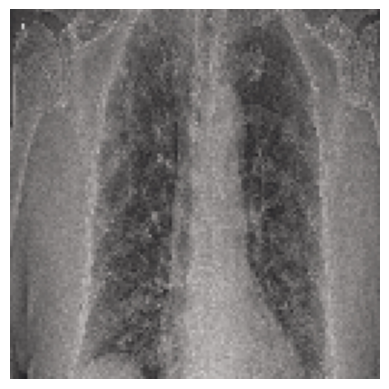

In [69]:
plt.imshow(images[0])
print('Label for the first image:', labels[0])
plt.axis('off')
plt.show()

In [70]:
images = np.array(images)
images.shape

(1823, 128, 128, 3)

In [71]:
images = images.astype('float32') / 255.0
images.shape

(1823, 128, 128, 3)

In [72]:
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder

In [73]:
y=diagnosis_df['diagnosis'].values
y

array(['covid', 'covid', 'covid', ..., 'normal', 'normal', 'normal'],
      dtype=object)

In [74]:
encoder=LabelEncoder ()
y = encoder.fit_transform (y)
y.shape

(1823,)

In [75]:
from sklearn.compose import ColumnTransformer
y=y.reshape(-1,1)
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0])],
    remainder='passthrough'
)

# Fit and transform the data using the ColumnTransformer
Y = ct.fit_transform(y)

# Print the shape of Y
print(Y.shape)

(1823, 3)


In [76]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [77]:
images, Y = shuffle(images, Y, random_state=1)

In [78]:
train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=1)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1458, 128, 128, 3)
(1458, 3)
(365, 128, 128, 3)
(365, 3)


In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, BatchNormalization, Dropout, Flatten, Dense

model = Sequential()
# Convolution Layer 1
model.add(Conv2D(32, kernel_size=(3,3), activation = "relu", padding='same', input_shape = (128, 128, 3)))
model.add(AvgPool2D(pool_size = (3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Convolution Layer 2
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation = "relu"))
model.add(AvgPool2D(pool_size = (3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Flatten & Linear Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax"))

In [92]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 average_pooling2d_16 (Aver  (None, 42, 42, 32)        0         
 agePooling2D)                                                   
                                                                 
 batch_normalization_16 (Ba  (None, 42, 42, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_22 (Dropout)        (None, 42, 42, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 40, 40, 64)        18496     
                                                                 
 average_pooling2d_17 (Aver  (None, 13, 13, 64)       

In [93]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [100]:
train_metrics=model.fit(train_x, train_y, epochs=15,  batch_size=20,validation_data=(test_x, test_y))

Epoch 1/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0900 - accuracy: 0.9712 - val_loss: 5.5091 - val_accuracy: 0.6712
Epoch 2/15
73/73 [==============================] - 1s 14ms/step - loss: 0.0446 - accuracy: 0.9877 - val_loss: 0.2860 - val_accuracy: 0.9370
Epoch 3/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0568 - accuracy: 0.9801 - val_loss: 0.4017 - val_accuracy: 0.9096
Epoch 4/15
73/73 [==============================] - 1s 14ms/step - loss: 0.0446 - accuracy: 0.9794 - val_loss: 0.3703 - val_accuracy: 0.9260
Epoch 5/15
73/73 [==============================] - 1s 14ms/step - loss: 0.0564 - accuracy: 0.9835 - val_loss: 0.5589 - val_accuracy: 0.9014
Epoch 6/15
73/73 [==============================] - 1s 12ms/step - loss: 0.0478 - accuracy: 0.9863 - val_loss: 0.4543 - val_accuracy: 0.9205
Epoch 7/15
73/73 [==============================] - 1s 13ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.3212 - val_accuracy: 0.9370
Epoch 8/15
73

In [101]:
history_df = pd.DataFrame(train_metrics.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.090009,0.971193,5.509114,0.671233
1,0.044602,0.987654,0.286045,0.936986
2,0.056783,0.980110,0.401688,0.909589
3,0.044593,0.979424,0.370298,0.926027
4,0.056376,0.983539,0.558867,0.901370
5,0.047810,0.986283,0.454331,0.920548
6,0.049185,0.984911,0.321180,0.936986
7,0.040600,0.986283,1.705459,0.887671
8,0.047233,0.983539,1.122063,0.819178
9,0.028201,0.990398,0.318235,0.934247


In [102]:
train_loss = history_df["loss"]
train_accuracy = history_df["accuracy"]
test_loss = history_df["val_loss"]
test_accuracy = history_df["val_accuracy"]

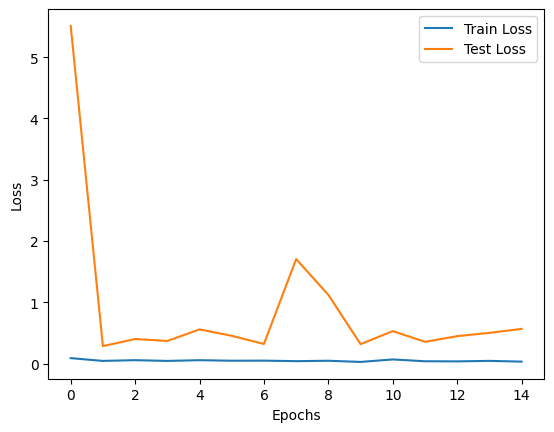

In [103]:
plt.plot(range(15), train_loss, label = "Train Loss")
plt.plot(range(15), test_loss, label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


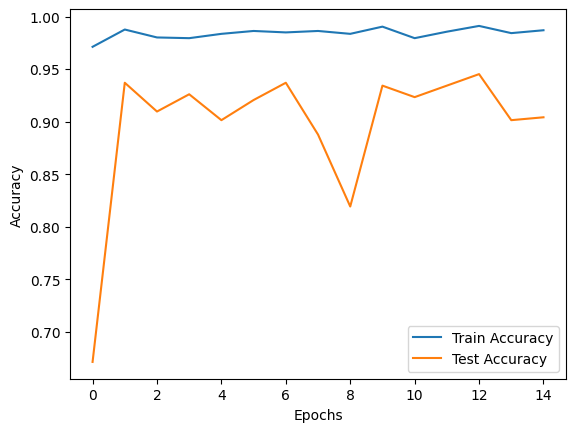

In [104]:
plt.plot(range(15), train_accuracy, label = "Train Accuracy")
plt.plot(range(15), test_accuracy, label = "Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()